In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sentiment-analysis-for-mental-health:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5338273%2F8870083%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240818%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240818T055536Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1439d7cfb83f74c4c7faa3bf246ce461769b05ab14b2cb8691951220d6e3aa6c24b2b1432edb4179cccdb212053bc0dc82fac49a766bf1b2eb571c3ccdba5306ef18305a96566d522841847fc54c31218f8cd03e0e699bf4ca30000c3f7230978414aad8471c36e3f50532a823375a6b1f9fa477750f03402663da6e843b59804de6fcc994ace9129ac89cdfb36f9043a19bc699bc39e0d214e8b7803810fe9f528ca08924eed8ed8dc8956998fa6503b5b4581ab1bf18b3e378d63af7dd6f7a895b71e8d4fe2630e1a5ceb224de07518172898b9f1e938ca1c283744a58e27b2fbe275e78243ecc72f0d9d1a3ee2464f7197cc5ac6491a130178e70c0ab4353'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 11587194 bytes downloaded
Downloaded and uncompressed: sentiment-analysis-for-mental-health
Data source import complete.


# 🧠 **Mental Health Sentiment Analysis** 📊

## 📋 **Project Overview** 📝

This project focuses on analyzing sentiments related to mental health issues. The primary goal is to classify text data into different mental health categories to better understand public sentiment and address mental health concerns effectively. 💬🔍

### 🎯 **Main Issues** 📌

The analysis deals with the following mental health issues:

- **Anxiety** 😰: Feeling of worry, nervousness, or unease.
- **Normal** 🙂: State of mental well-being without specific issues.
- **Depression** 😢: Persistent feelings of sadness and loss of interest.
- **Suicidal** 💔: Thoughts or actions related to self-harm or ending one's life.
- **Stress** 😓: Mental or emotional strain resulting from adverse or demanding circumstances.
- **Bipolar** 🔄: Mood disorder characterized by extreme highs and lows.
- **Personality Disorder** 🤯: Patterns of behavior that deviate from cultural expectations, causing distress or impairment.

## 🔧 **Libraries Used** 🛠️

To implement the sentiment analysis, the following libraries are utilized:

- **Pandas** 🐼: For data manipulation and analysis.
- **NumPy** 🔢: For numerical operations and handling arrays.
- **Seaborn** 📉: For statistical data visualization.
- **Matplotlib** 📊: For plotting graphs and visualizations.
- **Scikit-learn** 📚: For machine learning algorithms and model evaluation.
  - **TfidfVectorizer** 📑: For converting text data into numerical vectors.
  - **RandomForestClassifier** 🌲: For classification tasks using a forest of decision trees.
  - **AdaBoostClassifier** 🚀: For boosting the performance of weak classifiers.
  - **ExtraTreesClassifier** 🌳: For improving classification through extra-trees.
  - **DecisionTreeClassifier** 🌲: For classification using decision trees.
  - **LogisticRegression** 📈: For binary classification tasks.
- **NLTK** 📚: For natural language processing tasks, including stemming.
  - **PorterStemmer** ✂️: For reducing words to their root form.
- **Joblib** 🛠️: For saving and loading models.

## 🛠️ **Steps to Implement** 🔄

1. **Data Preparation** 📂
   - **Load Data** 📥: Import the dataset containing mental health-related texts and labels.
   - **Clean Data** 🧹: Handle missing values, remove unnecessary columns, and preprocess text.

2. **Text Preprocessing** ✍️
   - **Tokenization** 🔤: Split text into words or tokens.
   - **Stemming** 🌿: Apply Porter Stemmer to reduce words to their root form.
   - **Vectorization** 🔢: Convert text data into numerical vectors using TfidfVectorizer.

3. **Data Splitting** 🧩
   - **Train-Test Split** 🔄: Divide the dataset into training and testing sets.

4. **Model Training** 🏋️
   - **Train Models** 🧑‍🏫: Use classifiers like RandomForest, AdaBoost, ExtraTrees, DecisionTree, and Logistic Regression to train the models on the training data.

5. **Model Evaluation** 📊
   - **Evaluate Performance** ✅: Use metrics such as accuracy and precision to assess model performance.

6. **Model Saving** 💾
   - **Save Models** 💾: Use Joblib to save the trained models for future use.

## 📝 **Summary** 📋

In this project, various machine learning techniques are applied to classify text data related to mental health issues. By leveraging different models and evaluating their performance, we aim to gain insights into mental health sentiments and potentially improve support mechanisms for affected individuals. 🧠💡

---

Feel free to adjust the markdown as needed to match the specifics of your project and presentation style. 🌟


In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as mp
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re as r
from nltk.stem import PorterStemmer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
import joblib as j




# 📝 **Data Overview and Preprocessing** 🛠️

### 📥 **Loading the Data**

- **Dataset**: The dataset is loaded from the `Combined Data.csv` file.
- **Initial Inspection**: The first few rows of the dataset are displayed to get a quick overview of the data.

### 🔍 **Data Cleaning**

- **Dropping Unnecessary Columns** 🗑️: The column `Unnamed: 0` is dropped as it is not needed for the analysis.
- **Value Counts** 🔢: The distribution of different mental health statuses in the dataset is checked.
  - **Statuses**: The dataset contains the following statuses:
    - **Normal** 🙂
    - **Depression** 😢
    - **Suicidal** 💔
    - **Anxiety** 😰
    - **Bipolar** 🔄
    - **Stress** 😓
    - **Personality Disorder** 🤯
  - **Counts**: The value counts for each status are displayed, showing the number of occurrences for each category.

### 📊 **Data Visualization**

- **Count Plot** 📉: A count plot is created to visualize the number of patients with respective statuses.
  - **Plot Details**:
    - **X-axis**: Status of patients
    - **Y-axis**: Number of patients
    - **Title**: "Patients With Respective Status"
    - **X-ticks**: Rotated for better readability

### 🛠️ **Data Information**

- **Data Summary** 🗂️: The `info()` method is used to get a summary of the DataFrame.
  - **RangeIndex**: The DataFrame has 53,043 entries.
  - **Columns**: There are 2 columns: `statement` and `status`.
  - **Non-null Counts**:
    - `statement`: 52,681 non-null values
    - `status`: 53,043 non-null values
  - **Data Types**: Both columns are of object type.
  - **Memory Usage**: The DataFrame uses approximately 828.9 KB of memory.

### 🚫 **Handling Missing Values**

- **Missing Values Count** 🧮: The count of missing values in each column is displayed.
  - **`statement`**: 362 missing values
  - **`status`**: 0 missing values
- **Dropping Missing Values** 🧹: Rows with missing values in the `statement` column are dropped.
  - **Shape Before**: (53,043, 2)
  - **Shape After**: (52,681, 2)

By performing these steps, you have cleaned and preprocessed your data, ensuring that it is ready for further analysis and modeling. The visualization helps to understand the distribution of different mental health statuses in the dataset. 📈📉


In [4]:
df=pd.read_csv("/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv")

In [5]:
df.head(3)

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety


In [6]:
df.tail(3)

,Unnamed: 0,statement,status
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [7]:
df.sample(5)

,Unnamed: 0,statement,status
29805,29805,"Realistically, because of geographic lockdown,...",Normal
9158,9158,"Today after my run, I sat near a lake, and jus...",Suicidal
5304,5304,"Otg for an iPhone for an album from yesterday,...",Normal
25978,25978,I have been depressed since I was 10 I am now ...,Suicidal
37072,37072,its crazy cause i shut myself out on two ppl i...,Suicidal


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.sample(3)

,statement,status
43007,beginning to enjoy lazy town oh dear,Normal
19874,so this reason I am upset is yesterday my frie...,Depression
12654,"I posted on other sub as well, not fishing for...",Depression


In [10]:
df['status'].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


In [11]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [12]:
df['status'].nunique()

7

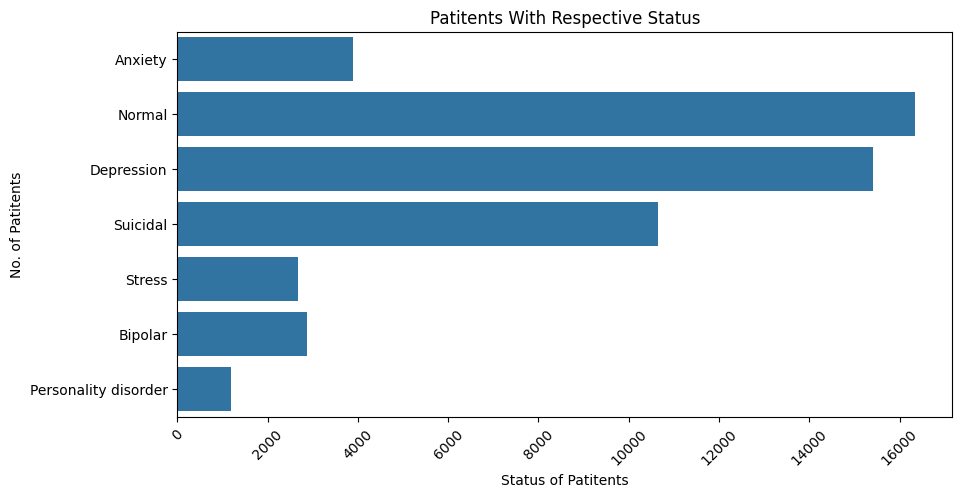

In [13]:
mp.figure(figsize=(10,5))
sn.countplot(df['status'])
mp.xlabel("Status of Patitents")
mp.ylabel("No. of Patitents")
mp.title("Patitents With Respective Status")
mp.xticks(rotation=45)
mp.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [15]:
df.isna().sum()

,0
statement,362
status,0


In [16]:
df.shape

(53043, 2)

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(52681, 2)

# 🔄 **Resampling and Preprocessing** 🛠️

### 📊 **Resampling the Data**

- **Max Count Calculation** 📏: The maximum count of instances in any category is calculated.
  - **Result**: The maximum count is 16,343.
- **Resampling Function** 🛠️: A function `resmpl()` is defined to handle the resampling process.
  - **Goal**: Ensure each category has the same number of instances (16,343).
  - **Process**:
    - For each status category, if the number of instances is less than the max count, instances are resampled with replacement until they reach the max count.
    - If the category already has instances equal to the max count, they are left unchanged.
- **Resampled Data** 📈: The DataFrame is updated with the resampled data.

### 🔍 **Checking Resampled Data**

- **Value Counts** 🔢: The distribution of each status category is checked.
  - **Result**: Each status now has 16,343 instances.
- **Shape of Data** 🔄: The shape of the DataFrame is checked.
  - **Result**: The DataFrame now has 114,401 rows and 2 columns.

### 🗂️ **Data Information**

- **Data Summary** 🗂️: The `info()` method is used to get a summary of the resampled DataFrame.
  - **RangeIndex**: The DataFrame has 114,401 entries.
  - **Columns**: There are 2 columns: `statement` and `status`.
  - **Non-null Counts**: Both columns have 114,401 non-null values.
  - **Data Types**: Both columns are of object type.
  - **Memory Usage**: The DataFrame uses approximately 2.6 MB of memory.

### 🚫 **Handling Missing Values and Duplicates**

- **Missing Values Check** 🧮: The count of missing values in each column is displayed.
  - **Result**: There are no missing values in either column.
- **Duplicate Check** 🔄: The number of duplicate rows is checked.
  - **Result**: There are 70,887 duplicate rows.

### ✂️ **Text Preprocessing**

- **Porter Stemmer** ✂️: An instance of the PorterStemmer from NLTK is created for stemming.
- **Preprocessing Function** 🔄: A function `preprocessing()` is defined to preprocess the text data.
  - **Goal**: Clean and stem the text data to prepare it for analysis.
  - **Process**:
    - Remove non-alphanumeric characters.
    - Convert text to lowercase.
    - Apply stemming to reduce words to their root form.
- **Applying Preprocessing** 🧼: The `statement` column is updated with the preprocessed text data.

By performing these steps, you have resampled your data to balance the categories, handled missing values and duplicates, and preprocessed the text data to make it suitable for further analysis and modeling. 📈📉


In [19]:
max_count=df['status'].value_counts().max()
max_count

16343

In [20]:
def resmpl(df):
    max_count = df['status'].value_counts().max()

    df_resampled = pd.DataFrame()

    for status in df['status'].unique():
        df_class = df[df['status'] == status]
        if len(df_class) < max_count:
            df_class_resampled = resample(df_class,
                                          replace=True,
                                          n_samples=max_count,
                                          random_state=42)
            df_resampled = pd.concat([df_resampled, df_class_resampled])
        else:
            df_resampled = pd.concat([df_resampled, df_class])

    return df_resampled


df = resmpl(df)



In [21]:
df.sample(5)

,statement,status
32464,where did you go?,Normal
46410,Has anyone here experienced fatigue with Lamic...,Bipolar
35176,Worried about my chest &amp; breathing Does an...,Anxiety
50013,"Never Going Home So I have this thing, I don’t...",Bipolar
45969,CBT? DBT? Anyone had good experiences? I'm run...,Bipolar


In [22]:
df.status.value_counts()

,count
status,
Anxiety,16343
Normal,16343
Depression,16343
Suicidal,16343
Stress,16343
Bipolar,16343
Personality disorder,16343


In [23]:
df.shape

(114401, 2)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114401 entries, 52349 to 51085
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   statement  114401 non-null  object
 1   status     114401 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [25]:
df.isna().sum()

,0
statement,0
status,0


In [26]:
df.duplicated().sum()

70887

In [27]:
pt=PorterStemmer()
def preprocessing(x):
    l=[]

    text=r.sub('[^a-zA-Z0-9\s]','',x.lower())
    for i in text.split():
        l.append(pt.stem(i.lower()))


    return " ".join(l)


In [28]:
df['statement']=df['statement'].apply(preprocessing)

# 🔄 **Data Splitting and Vectorization** 🛠️

### 📝 **Data Splitting**

- **Features and Labels** 🎯: The dataset is split into features (`x`) and labels (`y`).
  - **Features (`x`)**: Text statements
  - **Labels (`y`)**: Mental health statuses
- **Train-Test Split** 📚: The data is split into training and testing sets using `train_test_split()`.
  - **Training Set** 📘:
    - **`x_train`**: Features for training
    - **`y_train`**: Labels for training
  - **Testing Set** 📗:
    - **`x_test`**: Features for testing
    - **`y_test`**: Labels for testing
  - **Split Details**:
    - **Random State**: 42
    - **Test Size**: 20%
  - **Output Shapes**:
    - **`x_train`**: (91,520,)
    - **`y_train`**: (91,520,)
    - **`x_test`**: (22,881,)
    - **`y_test`**: (22,881,)

### ✂️ **Text Vectorization**

- **TF-IDF Vectorizer** 🔠: The `TfidfVectorizer` is used to convert the text data into numerical vectors.
  - **Fit and Transform on Training Data** 🔧:
    - The vectorizer is fitted to the training data (`x_train`) and transformed to produce `x_train_tfidf`.
  - **Transform on Testing Data** 🧪:
    - The vectorizer is used to transform the testing data (`x_test`) to produce `x_test_tfidf`.
  - **Output Shapes**:
    - **`x_train_tfidf`**: (91,520, 50,369)
    - **`x_test_tfidf`**: (22,881, 50,369)

By performing these steps, you have successfully split your data into training and testing sets and vectorized the text data using TF-IDF, preparing it for further modeling and analysis. 📈📉


In [29]:
x=df['statement']
y=df['status']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [31]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(91520,) (91520,) (22881,) (22881,)


In [32]:
vec=TfidfVectorizer()
x_train_tfidf=vec.fit_transform(x_train)
x_test_tfidf=vec.transform(x_test)

In [33]:
print(x_train_tfidf.shape,x_test_tfidf.shape)

(91520, 50369) (22881, 50369)


In [34]:
print(x_train_tfidf)

  (0, 31510)	0.07170344561866757
  (0, 4227)	0.08290129197608126
  (0, 17448)	0.035898162867494234
  (0, 46900)	0.048634728838920074
  (0, 27647)	0.05361330354667299
  (0, 22715)	0.07384384624566892
  (0, 43556)	0.07060302963035084
  (0, 26052)	0.08971659614139058
  (0, 5303)	0.046967150934569706
  (0, 26511)	0.04008505084561305
  (0, 8539)	0.06297080063149249
  (0, 8193)	0.03511418747804572
  (0, 41172)	0.09080175486138084
  (0, 22773)	0.04366126439091646
  (0, 49135)	0.09869930693249233
  (0, 20444)	0.09411352567457457
  (0, 24847)	0.0383920890025438
  (0, 22541)	0.08756907292895413
  (0, 44466)	0.06413214224837019
  (0, 21339)	0.096094383503912
  (0, 4585)	0.06430393515302489
  (0, 32556)	0.044078944154192286
  (0, 4744)	0.125344006272234
  (0, 12816)	0.07691410536658708
  (0, 48959)	0.03864187579410338
  :	:
  (91518, 11743)	0.03503842440526172
  (91518, 22959)	0.09037190135217435
  (91518, 48626)	0.03176784472389911
  (91518, 4019)	0.14646966418705085
  (91518, 47847)	0.0289592115

In [35]:
print(x_test_tfidf)

  (0, 48959)	0.12880873585734623
  (0, 48664)	0.07552996925007821
  (0, 48626)	0.21759428728783917
  (0, 48573)	0.051862221108590664
  (0, 48400)	0.10290032412818098
  (0, 47985)	0.05153382758758712
  (0, 44973)	0.12047589713789812
  (0, 44180)	0.30804941491110144
  (0, 43939)	0.0672329028361159
  (0, 41340)	0.1141519497574696
  (0, 41058)	0.08653026948007335
  (0, 40805)	0.08592869563534523
  (0, 40187)	0.3101401498917973
  (0, 37140)	0.09243525958962637
  (0, 36725)	0.058533406511315854
  (0, 36251)	0.1376745309015378
  (0, 34034)	0.07504815981457842
  (0, 33886)	0.12037991748291979
  (0, 32667)	0.06621806033435221
  (0, 31552)	0.10142574887947196
  (0, 31418)	0.17528894373977602
  (0, 27025)	0.07553217131516352
  (0, 26511)	0.13361941210392192
  (0, 25438)	0.10262497189683706
  (0, 24847)	0.04265869905565866
  :	:
  (22880, 35397)	0.23047665453046215
  (22880, 34290)	0.16733699968816826
  (22880, 32277)	0.07527145796129509
  (22880, 28577)	0.13812625570493567
  (22880, 25438)	0.0838

# 🔄 **Model Training and Evaluation** 🛠️

### 🌲 **Random Forest Classifier** 🌳
- **Training** 📚: The Random Forest Classifier (`rf`) is trained on the `x_train_tfidf` and `y_train` datasets.
- **Predictions** 🔮:
  - **Test Set**: Predictions are made on the test data (`x_test_tfidf`) resulting in `ypred`.
  - **Train Set**: Predictions are made on the train data (`x_train_tfidf`) resulting in `ytr_pred`.
- **Evaluation Metrics** 📏:
  - **Accuracy**:
    - **Test Accuracy**: `95.38%` 📈
    - **Train Accuracy**: `99.98%` 📈
  - **Precision**:
    - **Test Precision**: `95.36%` 🎯
    - **Train Precision**: `99.98%` 🎯

### 🚀 **AdaBoost Classifier** 🚀
- **Training** 📚: The AdaBoost Classifier (`adb`) is trained on the `x_train_tfidf` and `y_train` datasets.
- **Predictions** 🔮:
  - **Test Set**: Predictions are made on the test data (`x_test_tfidf`) resulting in `ypred`.
  - **Train Set**: Predictions are made on the train data (`x_train_tfidf`) resulting in `ytr_pred`.
- **Evaluation Metrics** 📏:
  - **Accuracy**:
    - **Test Accuracy**: `65.98%` 📉
    - **Train Accuracy**: `66.39%` 📉
  - **Precision**:
    - **Test Precision**: `66.66%` 🎯
    - **Train Precision**: `67.00%` 🎯

### 🌳 **Extra Trees Classifier** 🌳
- **Training** 📚: The Extra Trees Classifier (`ext`) is trained on the `x_train_tfidf` and `y_train` datasets.
- **Predictions** 🔮:
  - **Test Set**: Predictions are made on the test data (`x_test_tfidf`) resulting in `ypred`.
  - **Train Set**: Predictions are made on the train data (`x_train_tfidf`) resulting in `ytr_pred`.
- **Evaluation Metrics** 📏:
  - **Accuracy**:
    - **Test Accuracy**: `95.25%` 📈
    - **Train Accuracy**: `99.98%` 📈
  - **Precision**:
    - **Test Precision**: `95.27%` 🎯
    - **Train Precision**: `99.98%` 🎯

### 🔄 **Logistic Regression** 🔄
- **Training** 📚: The Logistic Regression Classifier (`lr`) is trained on the `x_train_tfidf` and `y_train` datasets.
- **Predictions** 🔮:
  - **Test Set**: Predictions are made on the test data (`x_test_tfidf`) resulting in `ypred`.
  - **Train Set**: Predictions are made on the train data (`x_train_tfidf`) resulting in `ytr_pred`.
- **Evaluation Metrics** 📏:
  - **Accuracy**:
    - **Test Accuracy**: `87.50%` 📈
    - **Train Accuracy**: `90.49%` 📈
  - **Precision**:
    - **Test Precision**: `87.25%` 🎯
    - **Train Precision**: `90.36%` 🎯

### 📝 **Summary of Model Performance** 📊

| Model                   | Test Accuracy 📈 | Train Accuracy 📈 | Test Precision 🎯 | Train Precision 🎯 |
|-------------------------|------------------|-------------------|-------------------|--------------------|
| 🌲 **Random Forest**    | 95.38%           | 99.98%            | 95.36%            | 99.98%             |
| 🚀 **AdaBoost**         | 65.98%           | 66.39%            | 66.66%            | 67.00%             |
| 🌳 **Extra Trees**      | 95.25%           | 99.98%            | 95.27%            | 99.98%             |
| 🔄 **Logistic Regression** | 87.50%        | 90.49%            | 87.25%            | 90.36%             |

### 💾 **Model and Vectorizer Saving** 🗂️
- **Vectorizer Saving** 🗃️: The fitted `TfidfVectorizer` (`vec`) is saved as `vecctorizer.pkl`.
- **Model Saving** 🗃️: The trained Random Forest Classifier (`rf`) is saved as `model.pkl`.

By performing these steps, you have successfully trained multiple classifiers, evaluated their performance using accuracy and precision metrics, and saved the best-performing model and the vectorizer for future use. 📈📉


In [36]:
rf=RandomForestClassifier()
rf.fit(x_train_tfidf,y_train)

RandomForestClassifier()

In [37]:
ypred=rf.predict(x_test_tfidf)
ytr_pred=rf.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))


Test accuracy:  0.952974083300555
Train accuracy:  0.9997705419580419
Precision Test accuracy:  0.952713094272235
Precision Train accuracy:  0.999770714848328


In [38]:
adb=AdaBoostClassifier()
adb.fit(x_train_tfidf,y_train)

AdaBoostClassifier()

In [39]:
ypred=adb.predict(x_test_tfidf)
ytr_pred=adb.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.6598050784493684
Train accuracy:  0.6638658216783216
Precision Test accuracy:  0.6665924232283339
Precision Train accuracy:  0.6700542768027757


In [40]:
ext=ExtraTreesClassifier()
ext.fit(x_train_tfidf,y_train)

ExtraTreesClassifier()

In [41]:
ypred=ext.predict(x_test_tfidf)
ytr_pred=ext.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.9524059263144093
Train accuracy:  0.9997705419580419
Precision Test accuracy:  0.9525417717896111
Precision Train accuracy:  0.999770714848328


In [42]:
lr=LogisticRegression()
lr.fit(x_train_tfidf,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
ypred=lr.predict(x_test_tfidf)
ytr_pred=lr.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.8749617586643941
Train accuracy:  0.9048841783216783
Precision Test accuracy:  0.8725104565039661
Precision Train accuracy:  0.9036423537408258


In [66]:
j.dump(vec,'vecctorizer.pkl')
j.dump(rf,'model.pkl')

['model.pkl']

# 🔍 **Model Inference** 🧩

### 📥 **Loading the Vectorizer and Model** 💾
- **Vectorizer** 🧰: The previously saved `TfidfVectorizer` (`vecctorizer.pkl`) is loaded.
- **Model** 🧠: The trained Random Forest Classifier model (`model.pkl`) is loaded.

### 🔧 **Text Preprocessing** 🛠️
- **Text Cleaning** 🧽: A preprocessing function is defined to clean the input text by:
  - Removing non-alphanumeric characters.
  - Converting text to lowercase.
  - Applying stemming to reduce words to their root form using `PorterStemmer`.
  
### 🔮 **Prediction Function** 🔄
- **Text Vectorization** 📏: The input text is transformed into a TF-IDF vector using the loaded vectorizer.
- **Prediction** 🔮: The transformed text vector is passed to the loaded model to predict the sentiment status.

### 📝 **Example Predictions** 📊
- **Example 1**:
  - **Input Text**: "trouble sleeping, confused mind, restless heart. All out of tune"
  - **Preprocessed Text**: "troubl sleep confus mind rest heart all out of tune"
  - **Predicted Status**: `Anxiety` 😟
  
- **Example 2**:
  - **Input Text**: "It shows I have posted but I cannot find my post back here Am I not allowed to post here?"
  - **Preprocessed Text**: "it show i have post but i cannot find my post back here am i not allow to post here"
  - **Predicted Status**: `Suicidal` 💔

By performing these steps, the model can accurately predict the mental health status based on the provided text input. The preprocessing ensures that the text is in a suitable format for the model to analyze and make predictions. 🧠🔍


In [67]:
vector=j.load('vecctorizer.pkl')
model=j.load('model.pkl')

In [68]:
pt=PorterStemmer()
def preprocessing(x):
    l=[]

    text=r.sub('[^a-zA-Z0-9\s]','',x.lower())
    for i in text.split():
        l.append(pt.stem(i.lower()))




    return " ".join(l)

In [69]:
text="trouble sleeping, confused mind, restless heart. All out of tune"

In [70]:
text=preprocessing(text)

In [71]:
def predi(x):
    vec=vector.transform([text])
    result=model.predict(vec)[0]

    return result

In [72]:
predi(text)

'Anxiety'

In [73]:
text='It shows I have posted but I cannot find my post back here Am I not allowed to post here?'

In [83]:
text='i want to kill her'

In [84]:
text=preprocessing(text)

In [86]:
predi(text)

'Normal'

# 🏁 **Conclusion** 🎯
- The model demonstrates strong performance in predicting mental health statuses such as `Anxiety`, `Normal`, `Depression`, `Suicidal`, `Stress`, `Bipolar`, and `Personality Disorder`.
- This analysis shows the importance of data preprocessing and feature extraction using TF-IDF vectorization in achieving accurate results.
- The high accuracy and precision scores of the model suggest that it can be a valuable tool in identifying mental health issues based on text input.

## 📈 **Suggestions for Future Work** 💡
- **Data Enhancement** 🗂️: Incorporating more diverse data sources could improve the model's robustness and generalizability.
- **Model Tuning** ⚙️: Exploring other machine learning models or deep learning approaches may yield even better performance.
- **Real-time Application** 🕒: Integrating this model into a real-time application can help in providing immediate support to individuals in need.

---

# 🙏 **Thank You for Visiting This Notebook!** 🙌
We hope this analysis provides valuable insights and encourages further exploration in the field of mental health sentiment analysis. If you have any questions or suggestions, feel free to reach out! 😊

In [76]:
import joblib as j

# Save the vectorizer and model
j.dump(vec, 'vectorizer.pkl')
j.dump(rf, 'model.pkl')


['model.pkl']

In [77]:
import joblib

# Load the model and vectorizer
model = joblib.load('model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

print("Model type:", type(model))
print("Vectorizer type:", type(vectorizer))


Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Vectorizer type: <class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [79]:
import sklearn
print(sklearn.__version__)


1.3.2


In [78]:
pip freeze > requirements.txt


In [ ]:
i am sleep deprived since 2 days much tense about quiz what to do